# Resampling with SWYFT - a proof of concept

In [1]:
import numpy as np
from scipy import stats, random
import pylab as plt

In [4]:
# Datastore with N samples from normal distribution

class DataStore:
    def __init__(self, x, z, u):
        assert len(x) == len(z)
        self.z = z # samples
        self.x = x # samples
        self.N = len(z)  # number of samples
        self.u = u  # intensity function
    
    def extract(self, p):
        # Extract samples
        
    def update(

In [46]:
# Create datastore with points drawn from constrained distribution

N = 10000     
sigma = .3
z = random.randn(N)*sigma + 0.5
z = z[z > 0.]
z = z[z < 1.]
u = lambda z: stats.norm.pdf(z, 0.5, sigma)
datastore = DataStore(z, u, u(0.5))

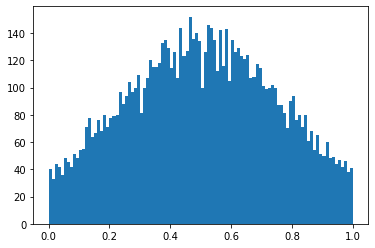

In [47]:
plt.hist(z, bins = 100);

In [342]:
class Sampler:
    def __init__(self, datastore, epsilon):
        self.epsilon = epsilon
        self.datastore = datastore
        self.available = np.ones(datastore.N, dtype = 'bool')
        self.ui = self.datastore.u(self.datastore.z)
    
    def __call__(self):
        zp = self._sample_prior()  # get proposal
        up = self.datastore.u(zp)
        umax = self.datastore.umax
        p, u0, u1 = self._get_partition(up, umax, self.epsilon)
        w = random.rand(1)[0]
        mask_p = (self.ui <= u1) & (self.ui > u0)
        avail_p = (mask_p & self.available).sum()
        if w > up/u1 or avail_p == 0:
            return zp
        else:
            i = list(mask_p & self.available).index(True)
            z = self.datastore.z[i]
            self.available[i] = False
            return z
    
    @staticmethod
    def _sample_prior():
        return random.rand(1)[0]
    
    def _pull(self, z):
        pass
    
    @staticmethod
    def _get_partition(up, umax, epsilon):
        """up is between epsilon^p < up/umax < epsilon^(p-1)
        
        returns:
            partition number p
            low bound
            up bound
        """
        p = np.floor(np.log(up/umax)/np.log(epsilon))+1
        p = int(p)
        return p, epsilon**p*umax, epsilon**(p-1)*umax
        

In [343]:
sampler = Sampler(datastore, 0.99)
print(sampler.available.sum())

9050


In [344]:
z = [sampler() for i in range(10000)]
print(sampler.available.sum())

997


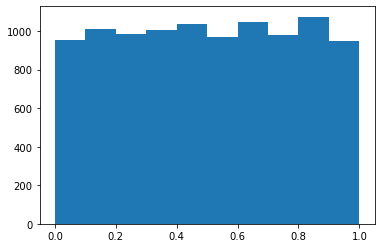

In [345]:
plt.hist(z, bins = 10);